# Lab2 : k-Nearest Neighbor (kNN) Implementation

You're required to implement kNN classifier from scratch, it's simple and easy.

To understand the k nearest neighbor, check the following video

https://www.youtube.com/watch?v=4ObVzTuFivY

Some of the following codes are copied from CS231n assignment1 notebooks


#### Important

For the notebook to work properly and for it to be able to load the cifar-10 dataset, you need to download the dataset from here : http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Then extract downloaded dataset to the folder 'cifar-10-batches-py', in the same directory with this notebook, this folder should contain the dataset files directly.

so the hierarchy should be
- cifar-10-batches-py
    - batches.meta
    - data_batch_1
    - etc
- data_utils.py
- knn.ipynb
- imgs

In [13]:
# Run some setup code for this notebook.

import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import pickle


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

('Training data shape: ', (50000L, 32L, 32L, 3L))
('Training labels shape: ', (50000L,))
('Test data shape: ', (10000L, 32L, 32L, 3L))
('Test labels shape: ', (10000L,))


In [15]:
# Subsample the data for more efficient code execution in this exercise and for the data to fit in memory
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]



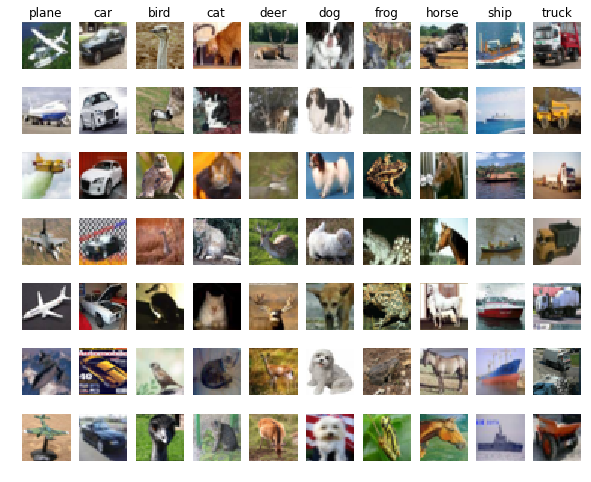

In [16]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

showing the second image
ground truth class =  truck


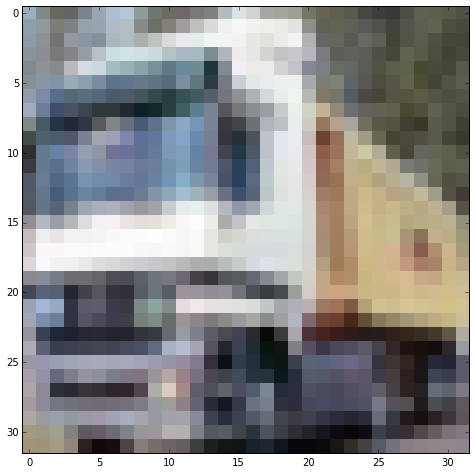

In [17]:
print "showing the second image"
print "ground truth class = ",classes[y_train[1]]
plt.imshow(X_train[1].astype('uint8'))


## how to compute the distance between images

One way to compute the distance between two matrices (images) is to do the following
<img src="imgs/absdiff.jpeg" height="400" width = "800" >

We won't use the above method, instead we'll compute the square root of the sum of square difference
- C = A - B
- C = C power 2
- C = np.sum(C)
- result = np.sqrt(C)

this can be done using

distance = np.sqrt(np.sum(np.square(A-B)))

In [18]:
# Reshape the image data into rows to easily manipulate them.
print X_train.shape, X_test.shape
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print X_train.shape, X_test.shape
print len(X_test),len(X_train)

(5000L, 32L, 32L, 3L) (500L, 32L, 32L, 3L)
(5000L, 3072L) (500L, 3072L)
500 5000


In [19]:
## classification

## compute the distances using two loops --> dist1

## distance matrix sum should be 12152853031.6
        
   

In [20]:
## try to use broadcasting (which is faster than for loops) to calculate the distance without using loops 
## make sure it's the same as the previous distance matrix --> dist2

## print np.sum(dist2-dist1) --> should be 0

        

### Different choices of K produce different classifiers

To understand the following image:

- The left image represent the input data to be classifier, each data point color represents its ***ground truth** class.

- In the middle and right images the backgroud color is the class that all the points within  this background will be classified to, you notice that in the right image, some parts have white background and this means that the knn classifier can't decide to which class this region belongs due to there're two neighbors of class x and two other neighbors of class y for in the whole area that has a white background.

- You can notice that increasing k makes the decision boundary more smooth and more robust to weird input distribution (a random red point that might be noisy inside a region that's full of blue points).

- The middle and right images are called **Decision Boundary**, it's important to know what's the expected decision boundary shape of all machine learning models that you'll know.

In the following labs, we'll understand how to decide the optimal number of neighbors to use.


***ground truth** is the class label that was decided by the human observer, we compare against the ground truth to measure how successful our machine learning model is

<img src="imgs/knn2.jpeg" height="400" width = "800" >

In [12]:
## compute accuracy --> how many test images has been correctly classifier / how many test images

## using k = 1 --> use only the nearest neighbor to decide



## accuracy for k = 1 should be 27%

## using k = 5 --> use the 5 nearest neighbors to decide which class (harder)

## you'll need the following function, if you've a list and you need to know which element
## was repeated the most use the following
from scipy import stats

arr = np.array([[1,2,3,4,5,5],[4,3,3,2,5,5]])

print stats.mode(arr,axis = 1) #--> 
print stats.mode(arr,axis = 1)[0][0] # most repeated element in the first row
print stats.mode(arr,axis = 1)[0][1] # most repeated element in the second row
print stats.mode(arr,axis = 1)[1][0] # repetition count of the most repeated element in the first row

## also check the following function output
## it produces the indices that can sort the array 
print np.argsort(arr) 


ModeResult(mode=array([[5],
       [3]]), count=array([[2],
       [2]]))
[5]
[3]
[2]
[[0 1 2 3 4 5]
 [3 1 2 0 4 5]]


### Why K-Nearest Neighbor on pixel level isn't perfect for image classification?

All the following images has the same distance from the left most image

<img src="imgs/knn3.png" height="400" width = "800" >

Pixel-based distances on high-dimensional data (and images especially) can be very unintuitive. An original image (left) and three other images next to it that are all equally far away from it based on L2 pixel distance. Clearly, the pixel-wise distance does not correspond at all to perceptual or semantic similarity.

#### In the following labs we'll explore how deep neural networks are capable of boosting our accuracy.